### FINA 4380 with Marius Popescu

### Data Visualization - Exercise Set Solutions

#### Import the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### 1. Create a DataFrame named rets_all by reading in the columns labeled 'date, 'TICKER', 'PRC' and 'CFACPR' from the file month_rets.csv. Set the column labeled 'date' as the index.

In [2]:
rets_all = pd.read_csv('month_rets.csv',
                       index_col = 'date',
                       usecols = ['date','TICKER', 'PRC', 'CFACPR'],
                       parse_dates = True)
rets_all.head()

,TICKER,PRC,CFACPR
date,,,
2013-01-31,MSFT,27.450,1.0
2013-02-28,MSFT,27.800,1.0
2013-03-28,MSFT,28.605,1.0
2013-04-30,MSFT,33.100,1.0
2013-05-31,MSFT,34.900,1.0


#### 2. Create a new column labeled 'ADJ_PRC' by dividing the closing price ('PRC') by the cumulative factor to adjust the price ('CFACPR')

In [3]:
rets_all['ADJ_PRC'] = rets_all['PRC'].div(rets_all['CFACPR'])

In [4]:
rets_all.head()

,TICKER,PRC,CFACPR,ADJ_PRC
date,,,,
2013-01-31,MSFT,27.450,1.0,27.450
2013-02-28,MSFT,27.800,1.0,27.800
2013-03-28,MSFT,28.605,1.0,28.605
2013-04-30,MSFT,33.100,1.0,33.100
2013-05-31,MSFT,34.900,1.0,34.900


#### 3. Create a DataFrame labeled data to store the simple returns and cumulative simple returns for all the stocks. Label the simple return columns as RET_`ticker` and the cumulative simple returns  columns CRET_`ticker`, where ticker represents the trading symbol of the stock whose returns are stored in that column.

In [5]:
data = pd.DataFrame()
for ticker in rets_all['TICKER'].unique():
    data['RET_'+ticker] = rets_all[rets_all['TICKER']==ticker]['ADJ_PRC'].pct_change()
    data['CRET_'+ticker]=data['RET_'+ticker].add(1).cumprod()-1
data.head()

,RET_MSFT,CRET_MSFT,RET_IBM,CRET_IBM,RET_FB,CRET_FB,RET_AAPL,CRET_AAPL,RET_AMZN,CRET_AMZN,RET_GOOGL,CRET_GOOGL
date,,,,,,,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,0.012750,0.012750,-0.011031,-0.011031,-0.120429,-0.120429,-0.030934,-0.030934,-0.004633,-0.004633,0.060223,0.060223
2013-03-28,0.028957,0.042077,0.062092,0.050377,-0.061284,-0.174333,0.002855,-0.028167,0.008400,0.003729,-0.008752,0.050944
2013-04-30,0.157140,0.205829,-0.050445,-0.002610,0.085575,-0.103676,0.000271,-0.027904,-0.047581,-0.044030,0.038255,0.091149
2013-05-31,0.054381,0.271403,0.027056,0.024376,-0.123195,-0.214099,0.015708,-0.012635,0.060636,0.013936,0.056573,0.152878


#### 4. Use Matplotlib to create a lineplot of Amazon's monthly return. Use a figure size of (10,6), add a grid, title, limits for both x and y, and a legend.

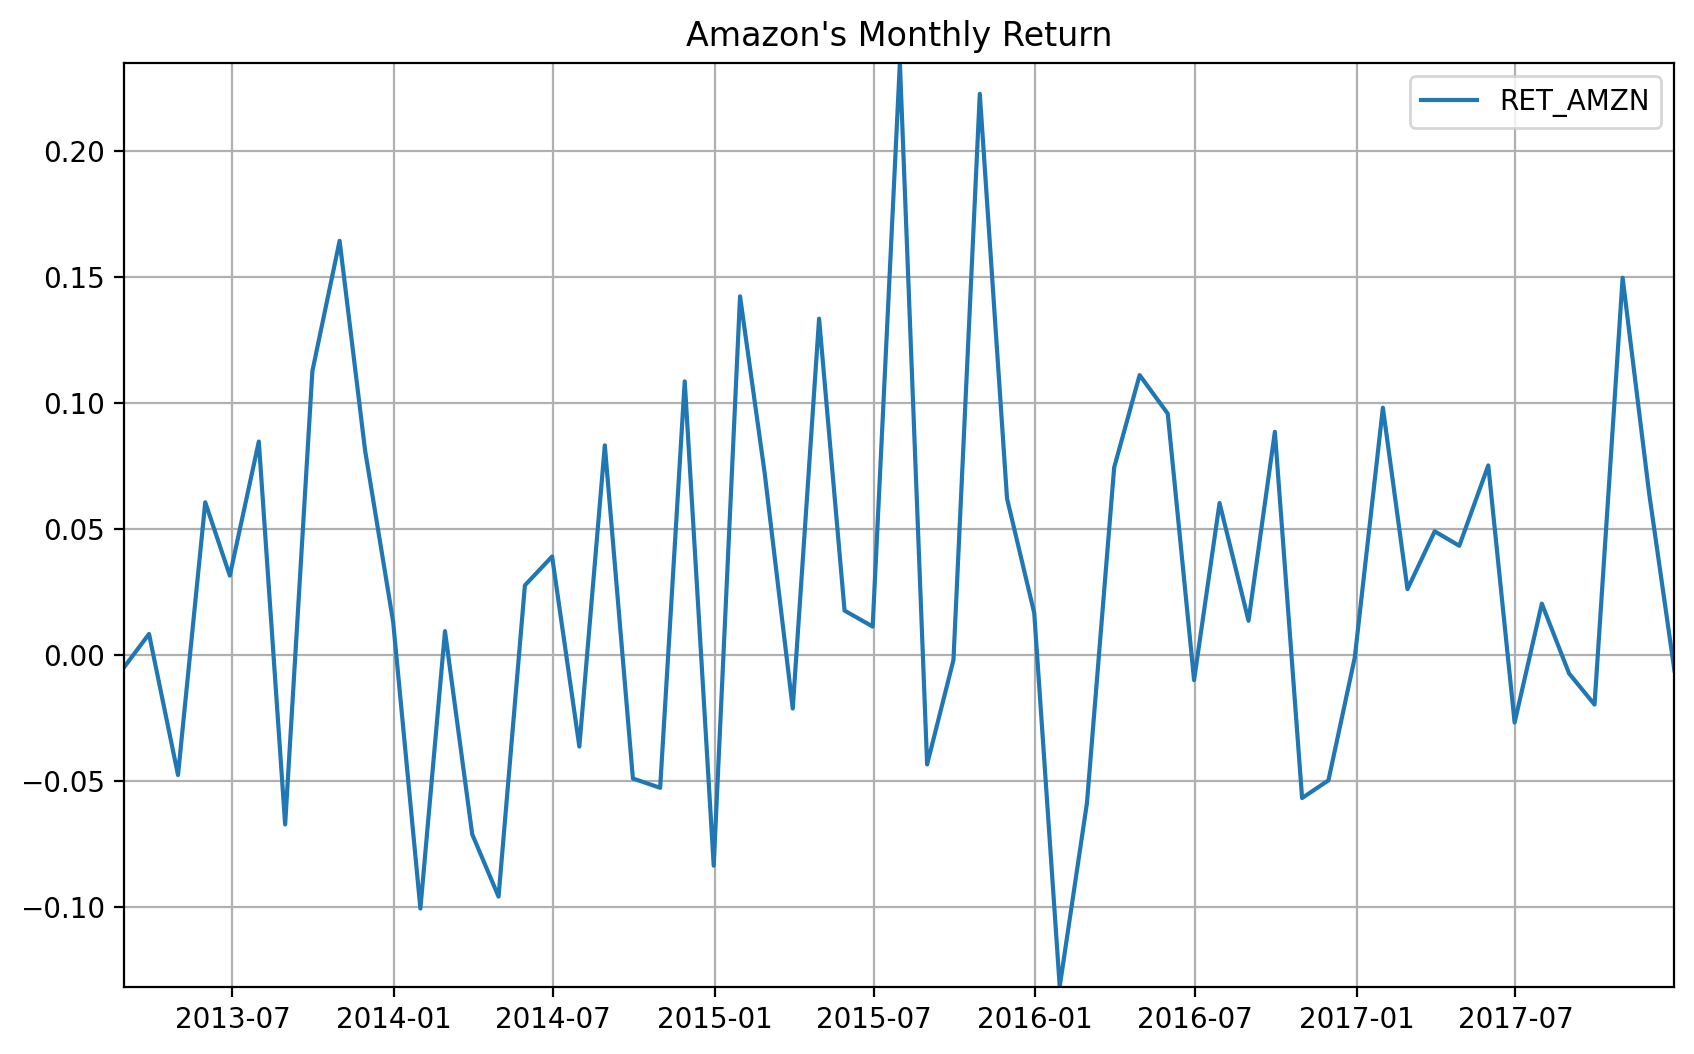

In [6]:
# Create figure, with a size of 10 by 6 inches
fig = plt.figure(figsize = (10,6))

# Add one subplot
ax = fig.add_subplot()

# Plot the data
ax.plot(data['RET_AMZN'], label='RET_AMZN')

# Add axis ranges(limits)
ax.set_xlim(data.index[1], data.index[-1])
ax.set_ylim(data['RET_AMZN'].min(),data['RET_AMZN'].max())         

# Add grid
ax.grid(True)

# Add title to the plot
ax.set_title("Amazon's Monthly Return")

# Add legend to the graph, and let matplotlib place it at the best location
ax.legend(loc = 'best');

#### 5. Use Pandas to create a lineplot with Amazon's monthly return. Use a figure size of (10,6), add a grid, title and limits for both x and y.

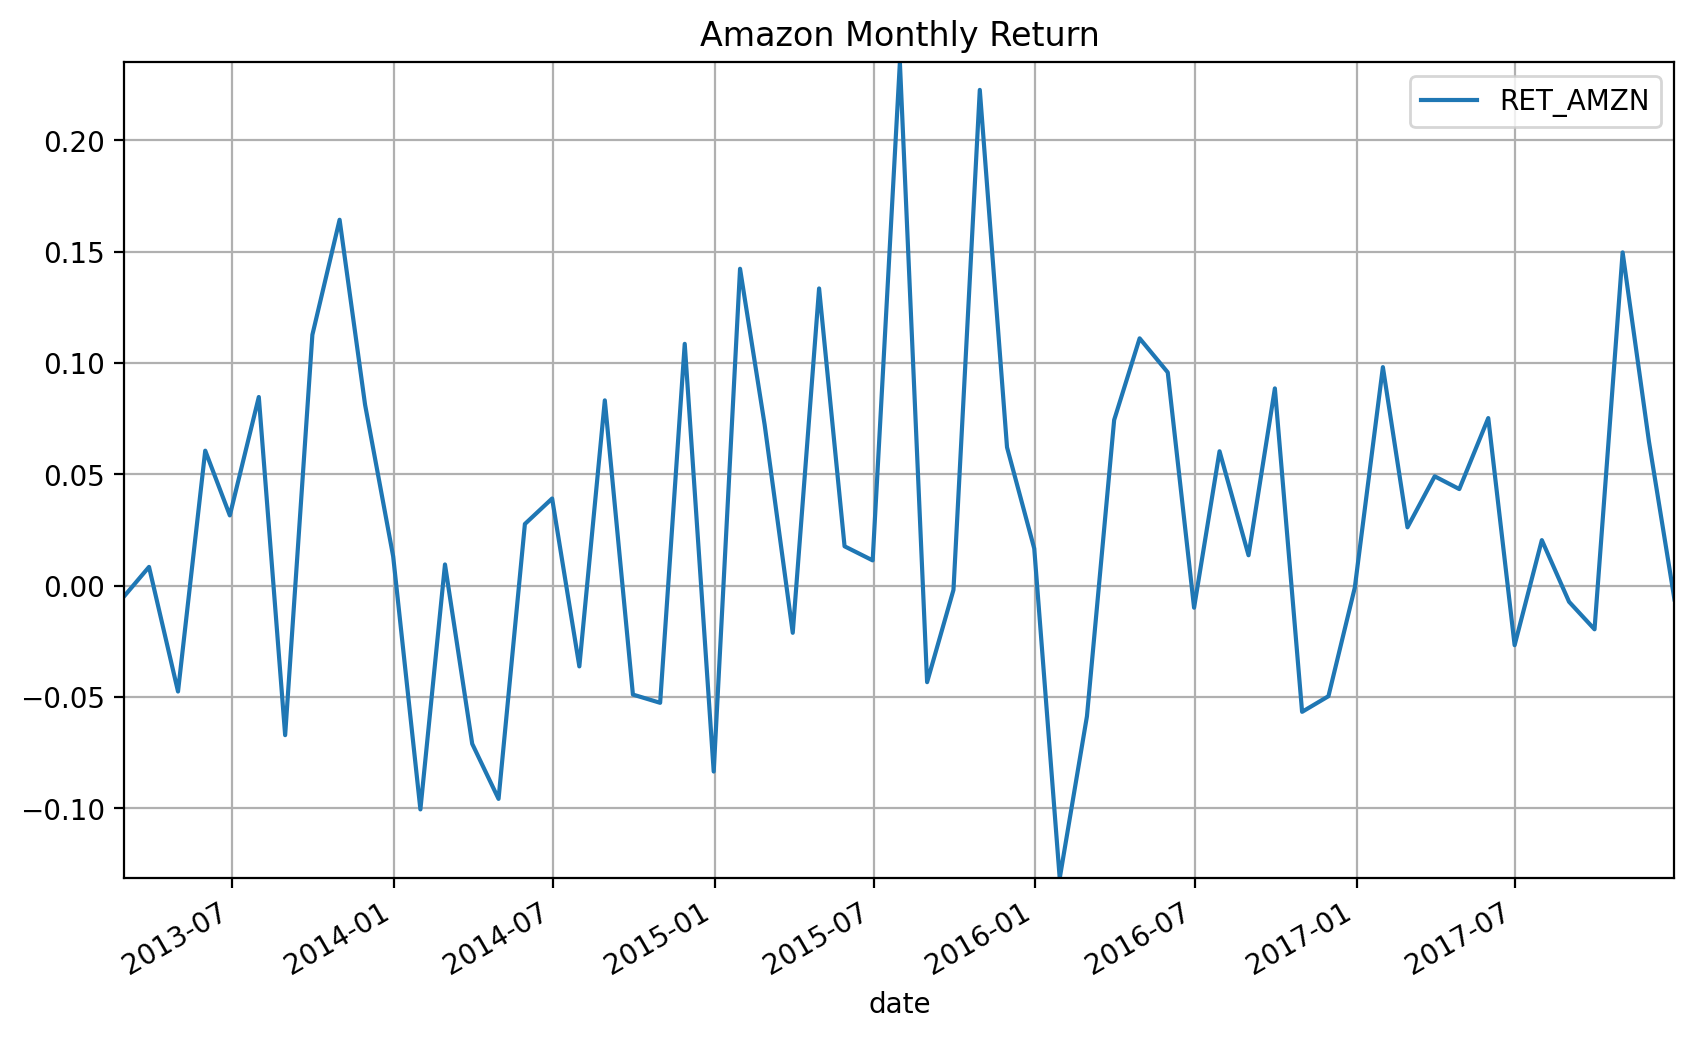

In [7]:
data.plot.line(y = 'RET_AMZN', figsize = (10,6), grid = True,
                   title = 'Amazon Monthly Return',
                   xlim = (data.index[1], data.index[-1]),
                   ylim = (data['RET_AMZN'].min(),data['RET_AMZN'].max()));

#### 6. Use Matplotlib to create a line plot of the cumulative return for all stocks. Use a figure size of (10,6), add a grid, title, limit for the x axis and a legend.

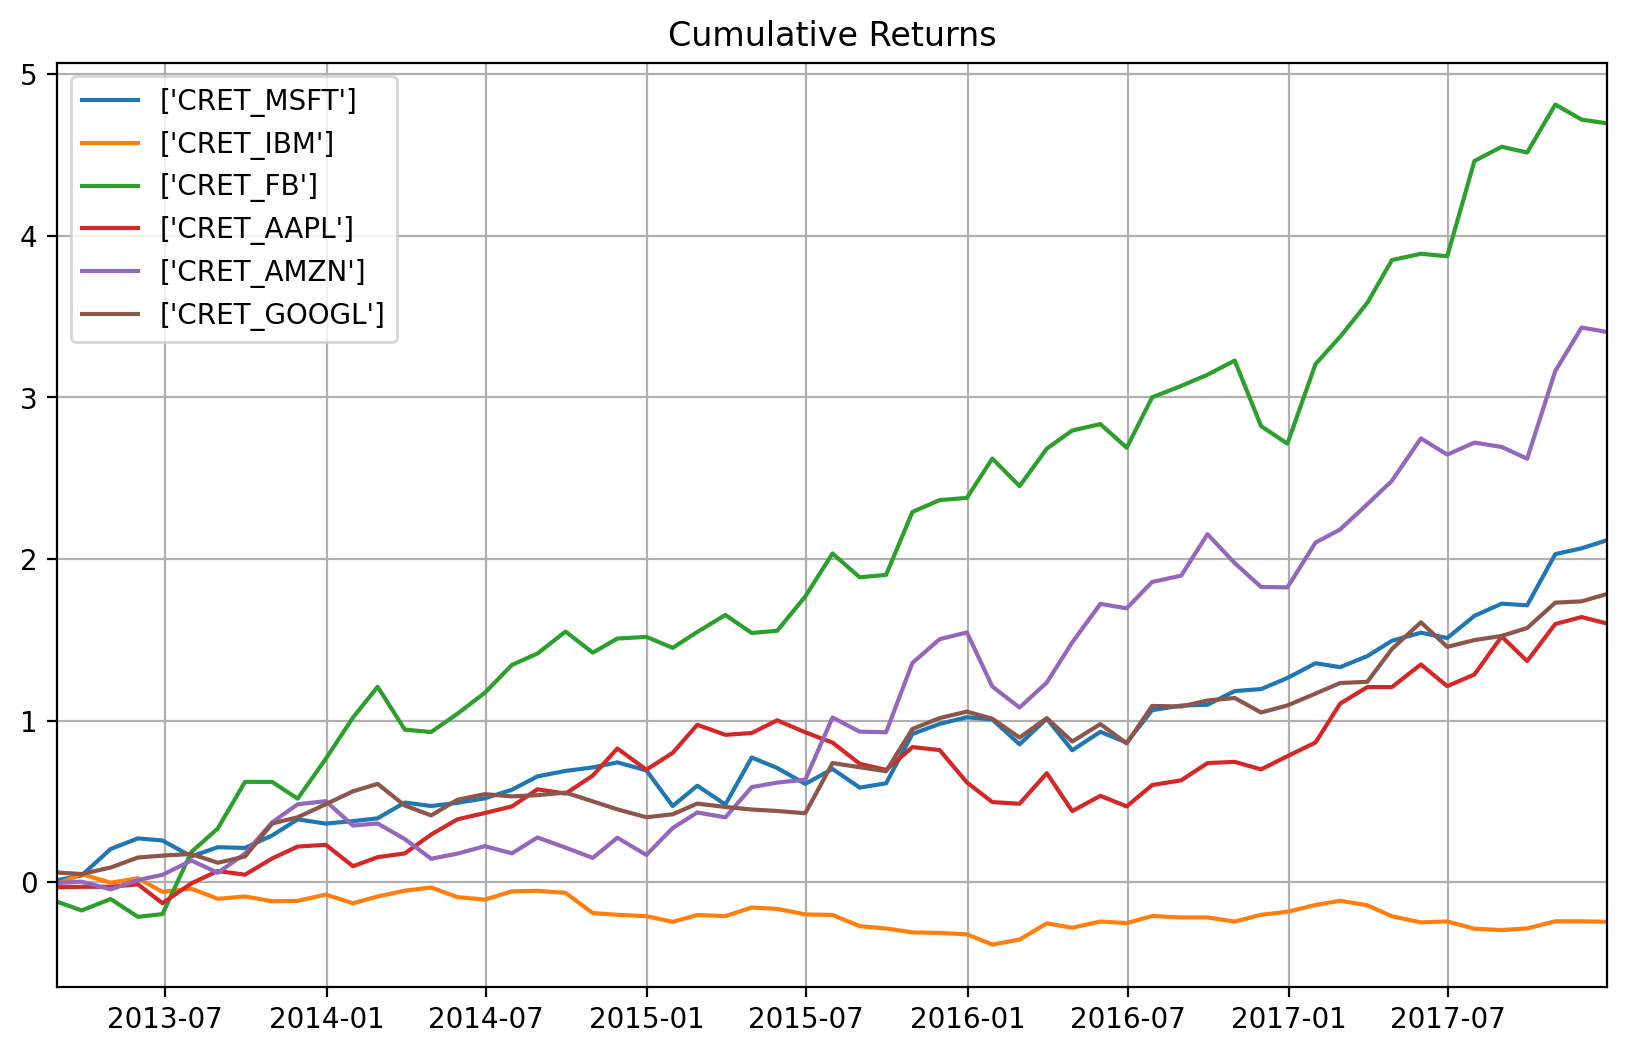

In [8]:
# Create figure, with a size of 10 by 6 inches
fig = plt.figure(figsize = (10,6))

# Add one subplot
ax = fig.add_subplot()

# Plot the data
for ticker in rets_all['TICKER'].unique():
    ax.plot(data['CRET_'+ticker], label=['CRET_'+ticker])

# Add axis ranges(limits)
ax.set_xlim(data.index[1], data.index[-1])     

# Add grid
ax.grid(True)

# Add title to the plot
ax.set_title("Cumulative Returns")

# Add legend to the graph, and let matplotlib place it at the best location
ax.legend(loc = 'best');

#### 7. Use Pandas to create a line plot of the cumulative return for all stocks. Use a figure size of (10,6), add a grid, title and limit for the x axis.

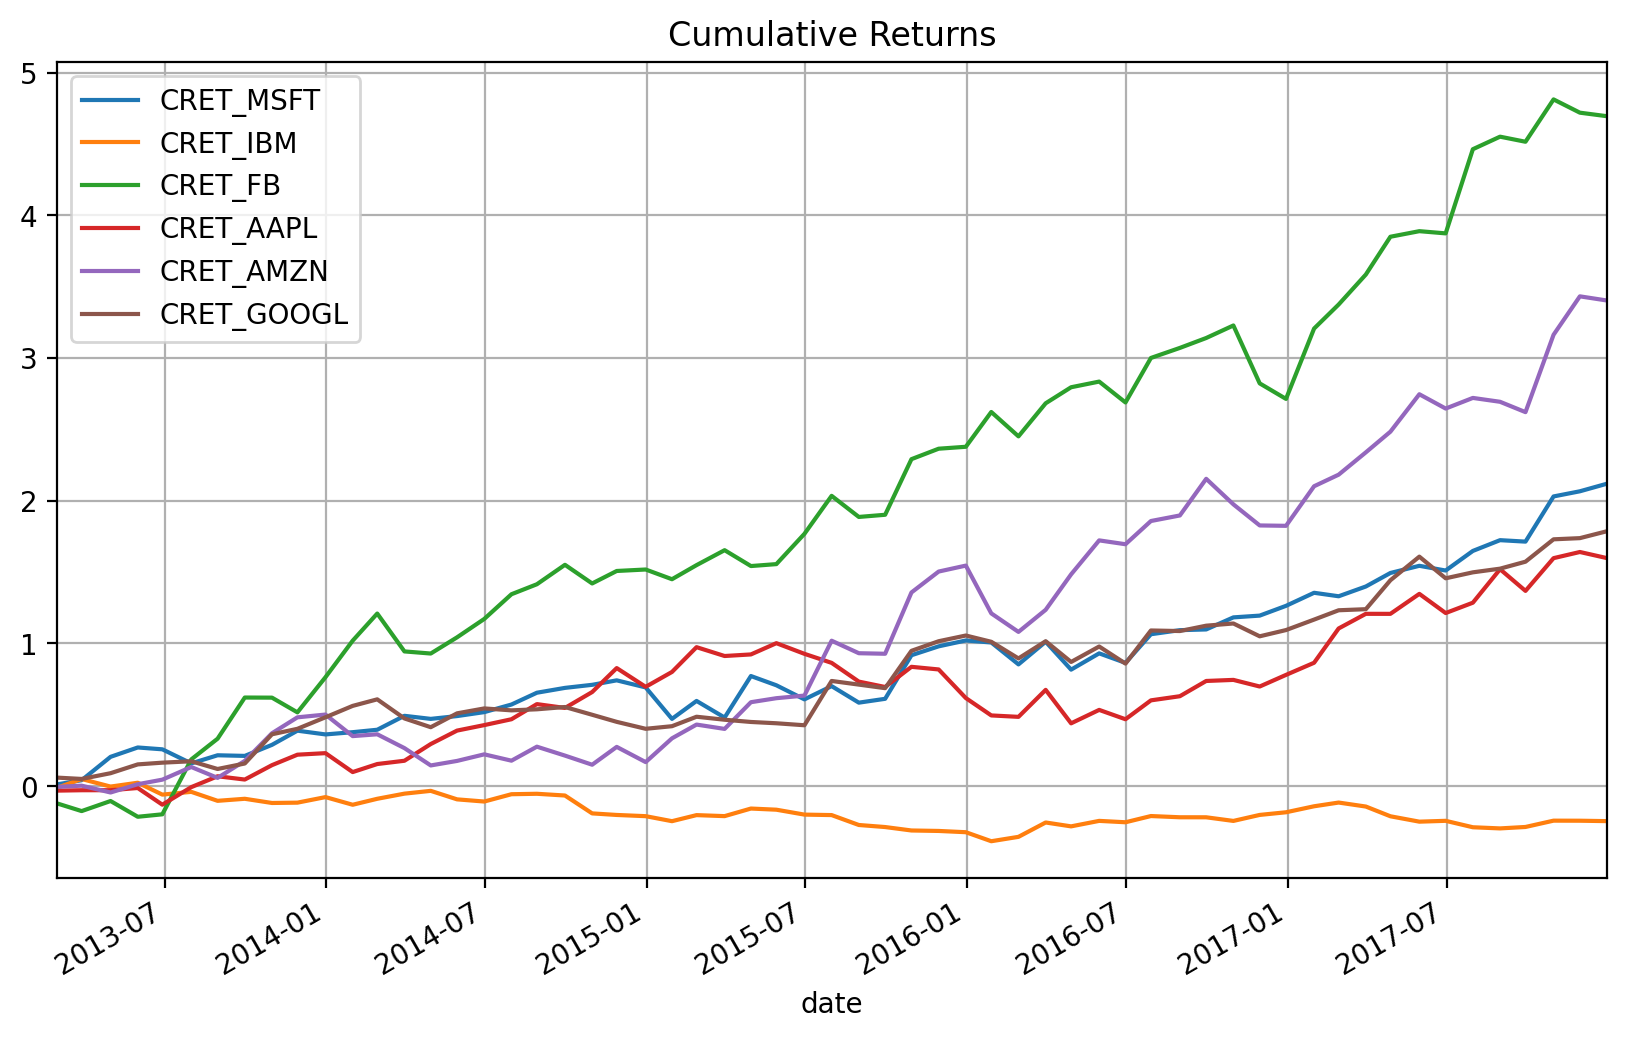

In [9]:
data.plot.line(y = ['CRET_MSFT', 'CRET_IBM', 'CRET_FB', 'CRET_AAPL', 'CRET_AMZN', 'CRET_GOOGL'],
               figsize = (10,6), grid = True, title = 'Cumulative Returns',
                   xlim = ('2013-02-28', '2017-12-31'));

#### 8. Use Matplotlib to create a histogram with Microsoft's monthly return. Use a figure size of (10,6), 20 bins, add a grid, title and a legend.

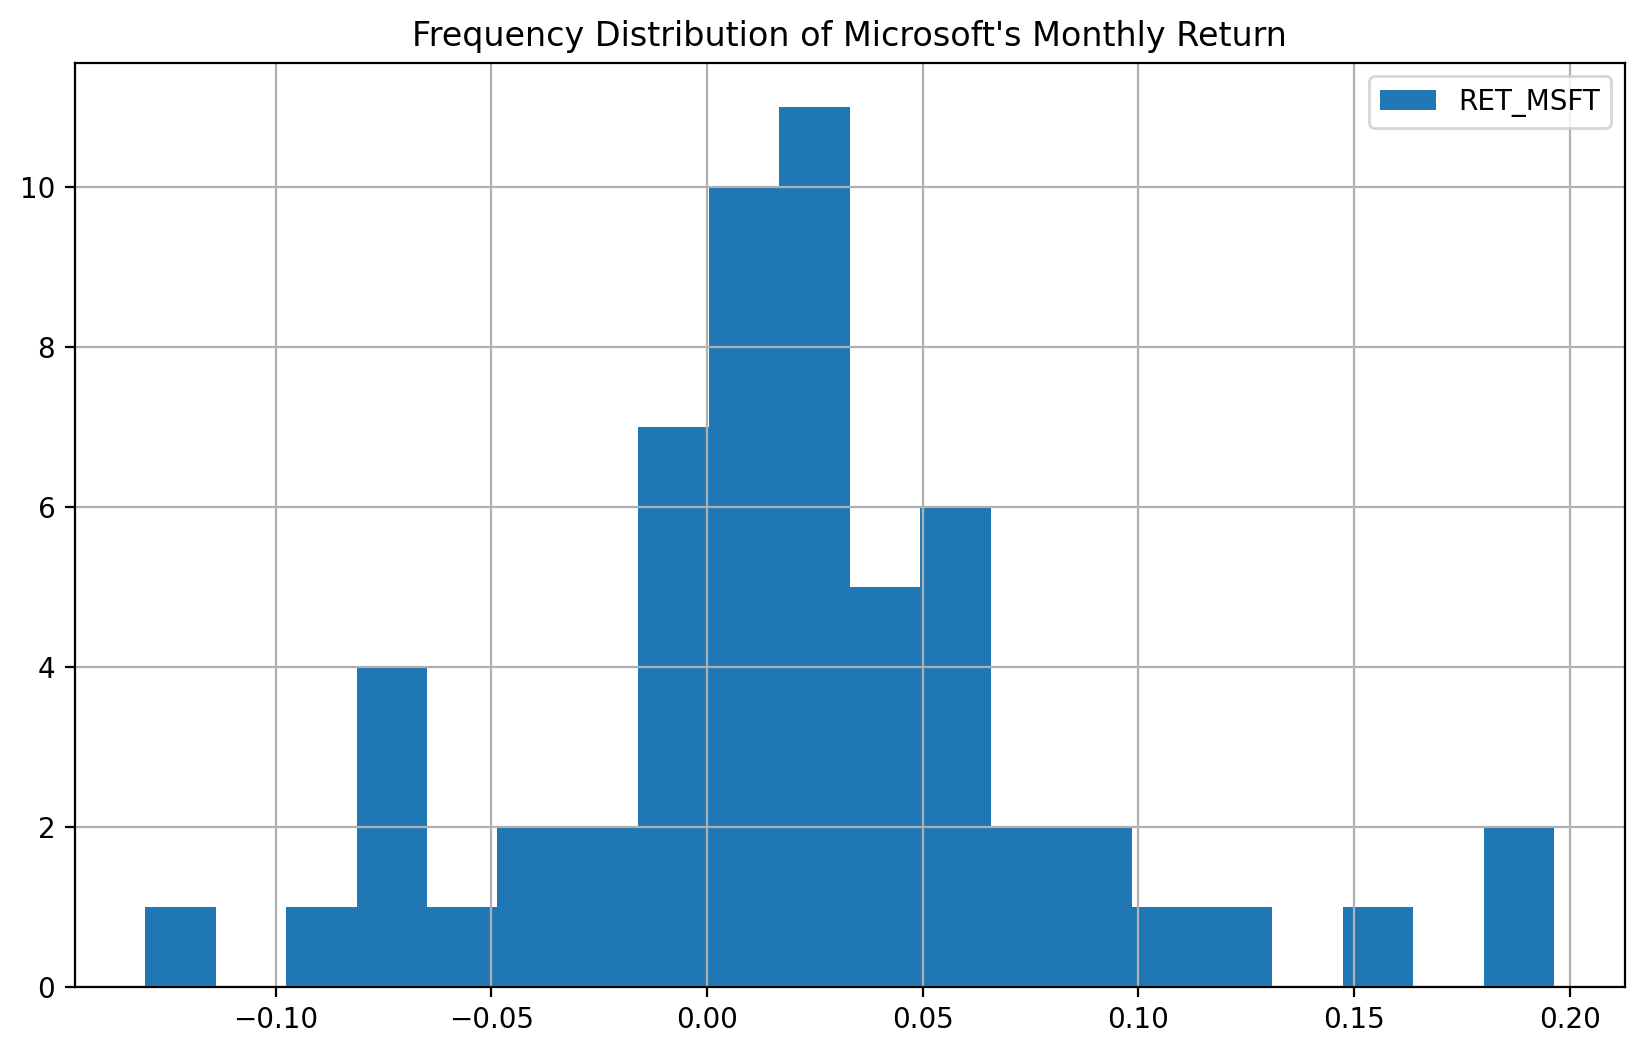

In [10]:
# Create figure, with a size of 10 by 6 inches
fig = plt.figure(figsize = (10,6))

# Add one subplot
ax = fig.add_subplot()

# Plot the data
ax.hist(data['RET_MSFT'], bins=20, label='RET_MSFT') 

# Add grids
ax.grid(True)

# Add title to the plot
ax.set_title("Frequency Distribution of Microsoft's Monthly Return")

# Add legend to the graph, and let matplotlib place it at the best location
ax.legend(loc = 'best');

#### 9. Use Pandas to create a histogram with Microsoft's monthly return. Use a figure size of (10,6), 20 bins, add a grid and title.

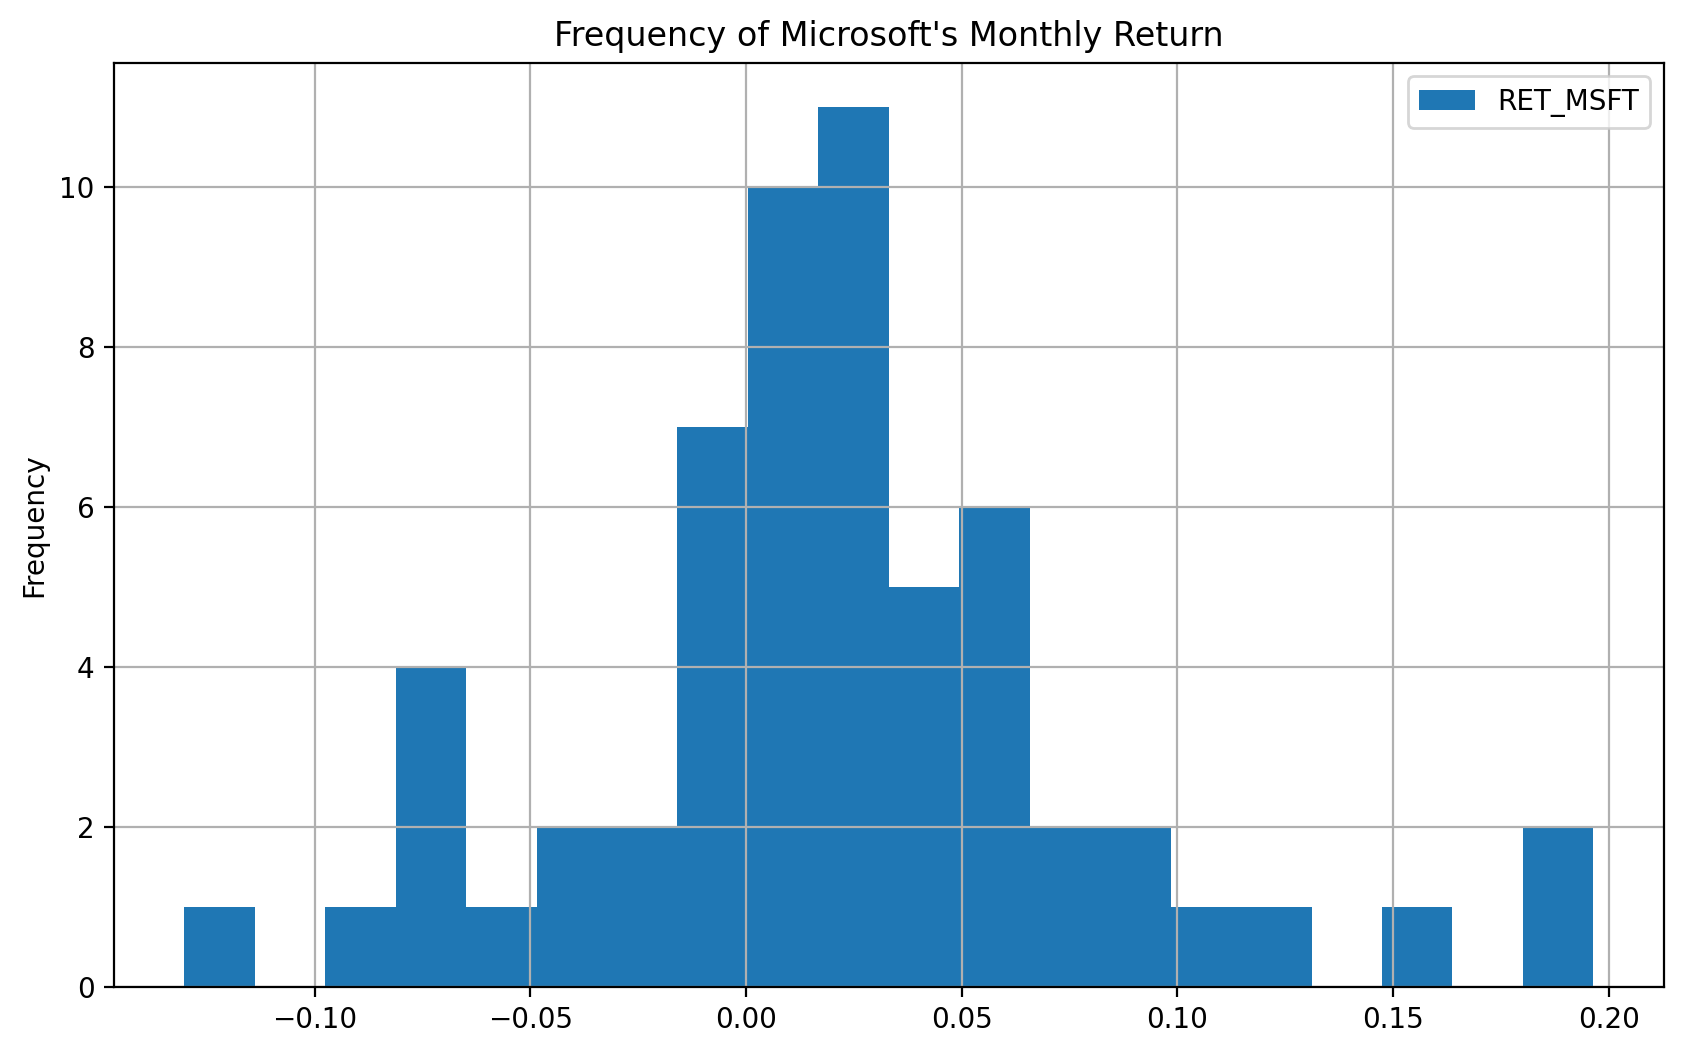

In [11]:
data.plot.hist(y = 'RET_MSFT', bins = 20, figsize = (10,6),
               grid = True, title = "Frequency of Microsoft's Monthly Return");

#### 10. Create a Kernel Density Plot of IBM's monthly return. Use a figure size of (10,6), add a grid and title.

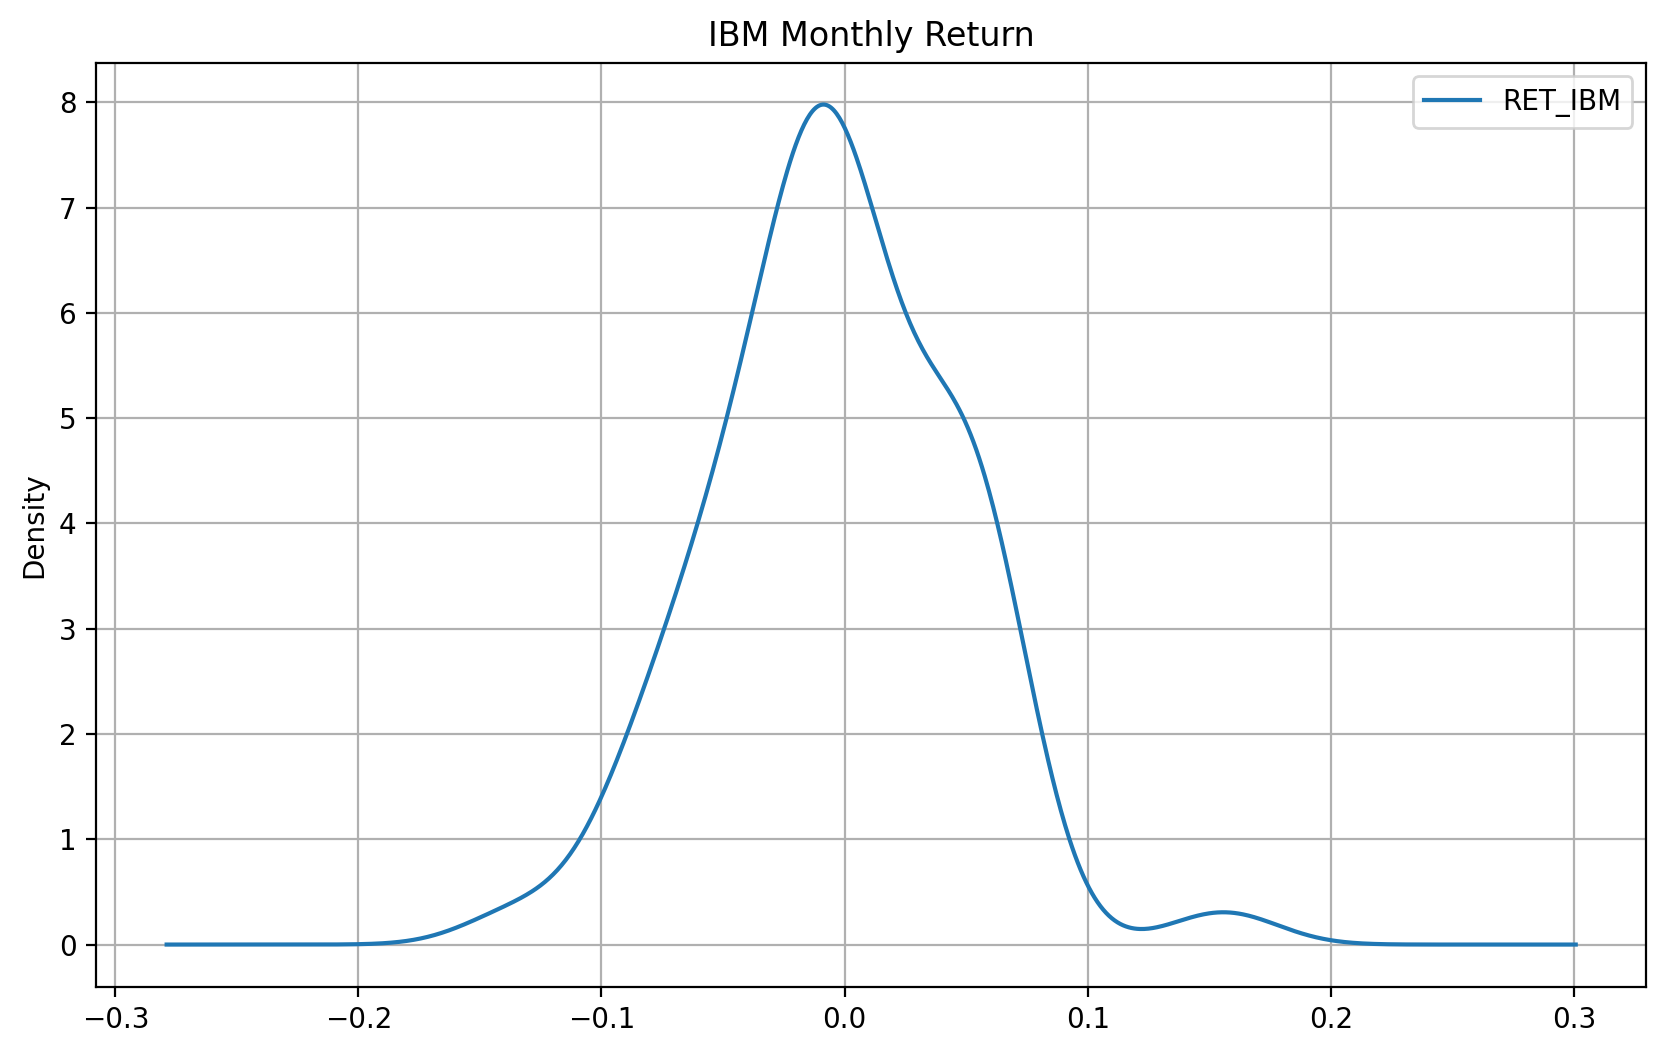

In [12]:
data.plot.kde(y = 'RET_IBM', figsize = (10,6), grid = True,
              title = 'IBM Monthly Return');

#### 11. Use the DataFrame data to compute the annual average monthly return for all stocks. Store them in a new DataFrame called rets_annual.

In [13]:
rets_annual = data.groupby(data.index.year)[['RET_MSFT','RET_IBM','RET_FB','RET_AAPL','RET_AMZN','RET_GOOGL']].mean()
rets_annual

,RET_MSFT,RET_IBM,RET_FB,RET_AAPL,RET_AMZN,RET_GOOGL
date,,,,,,
2013,0.030190,-0.006206,0.065318,0.021374,0.039761,0.037804
2014,0.018507,-0.011548,0.032353,0.029030,-0.018396,-0.003770
2015,0.019462,-0.011904,0.026170,-0.002163,0.070607,0.034716
2016,0.011188,0.017534,0.009244,0.010616,0.011368,0.003091
2017,0.027523,-0.005675,0.037319,0.033731,0.038922,0.024652


#### 12. Create a bar plot of all stocks' average monthly return (on y axis) across years (on x axis). Use a figure size of (10,6), add a grid and title.

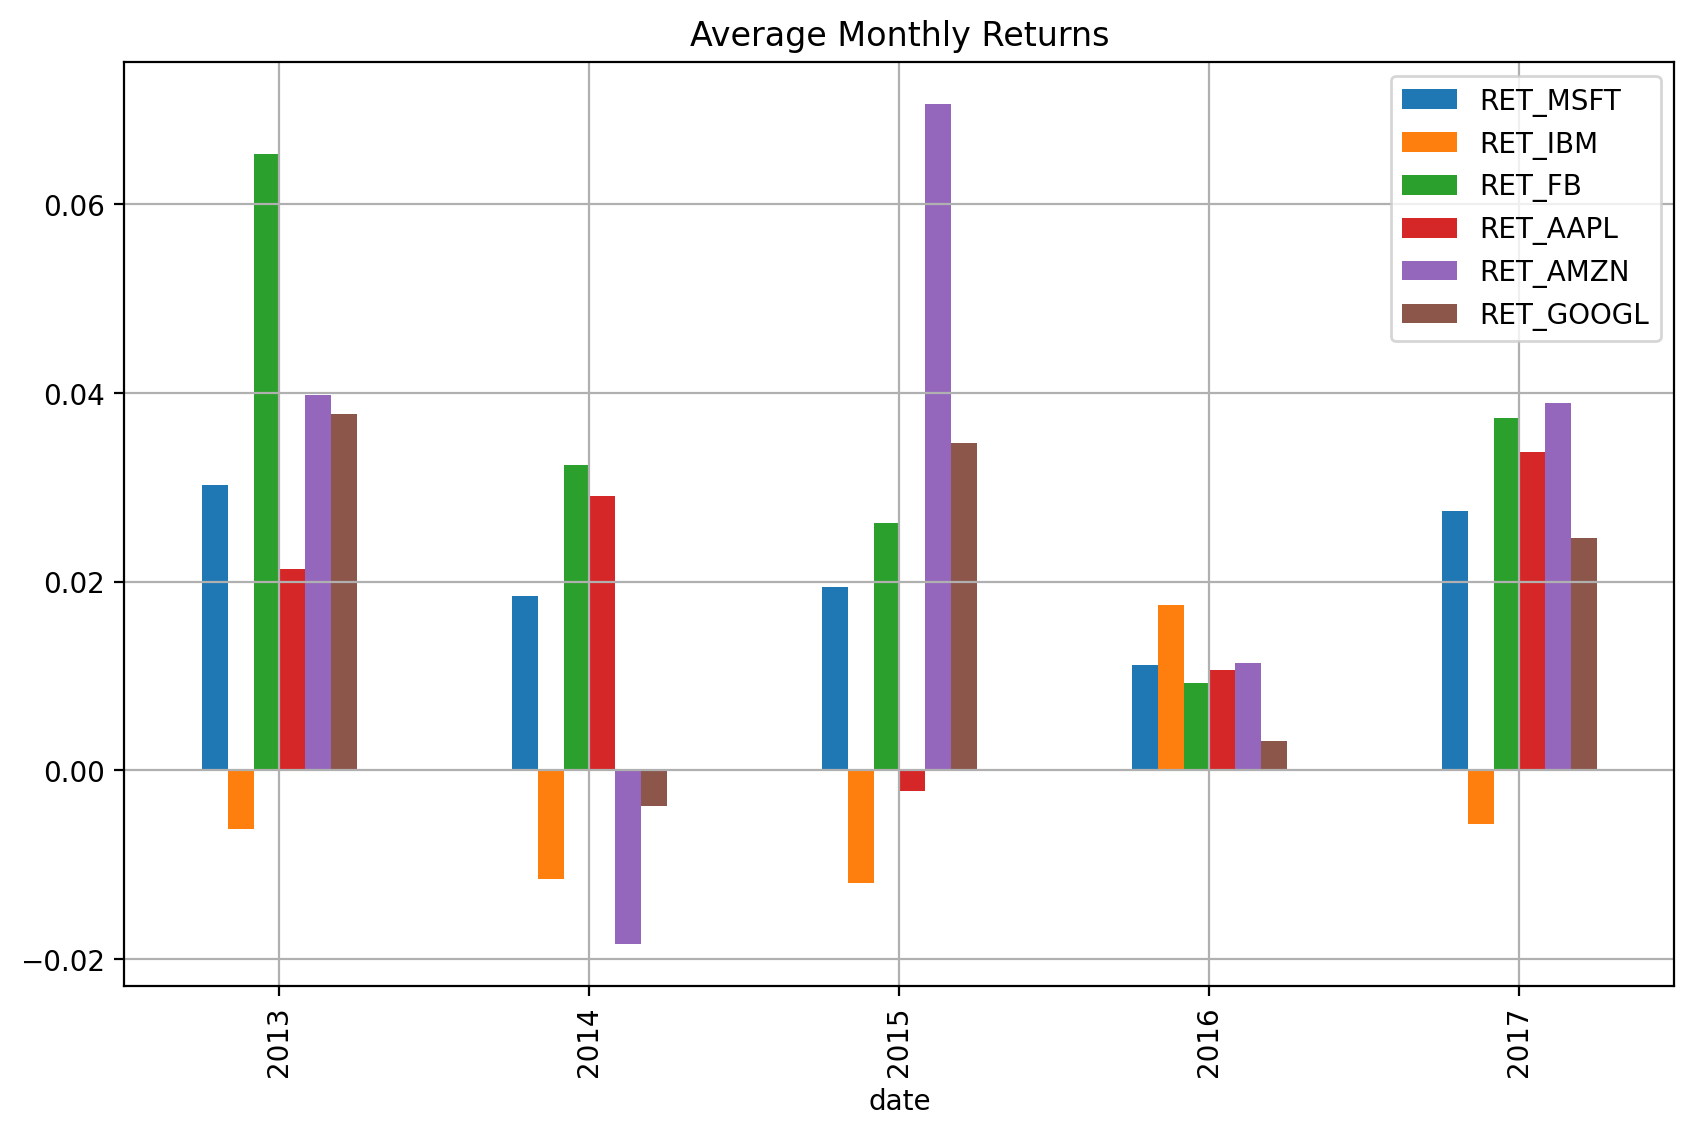

In [14]:
rets_annual.plot.bar(y = ['RET_MSFT','RET_IBM','RET_FB','RET_AAPL','RET_AMZN','RET_GOOGL'],
                     figsize = (10,6), grid = True,
                     title = 'Average Monthly Returns');

#### 13. Create a bar plot of Google's average monthly return (on y axis) across years (on x axis). Use a figure size of (10,6), add a grid and title.

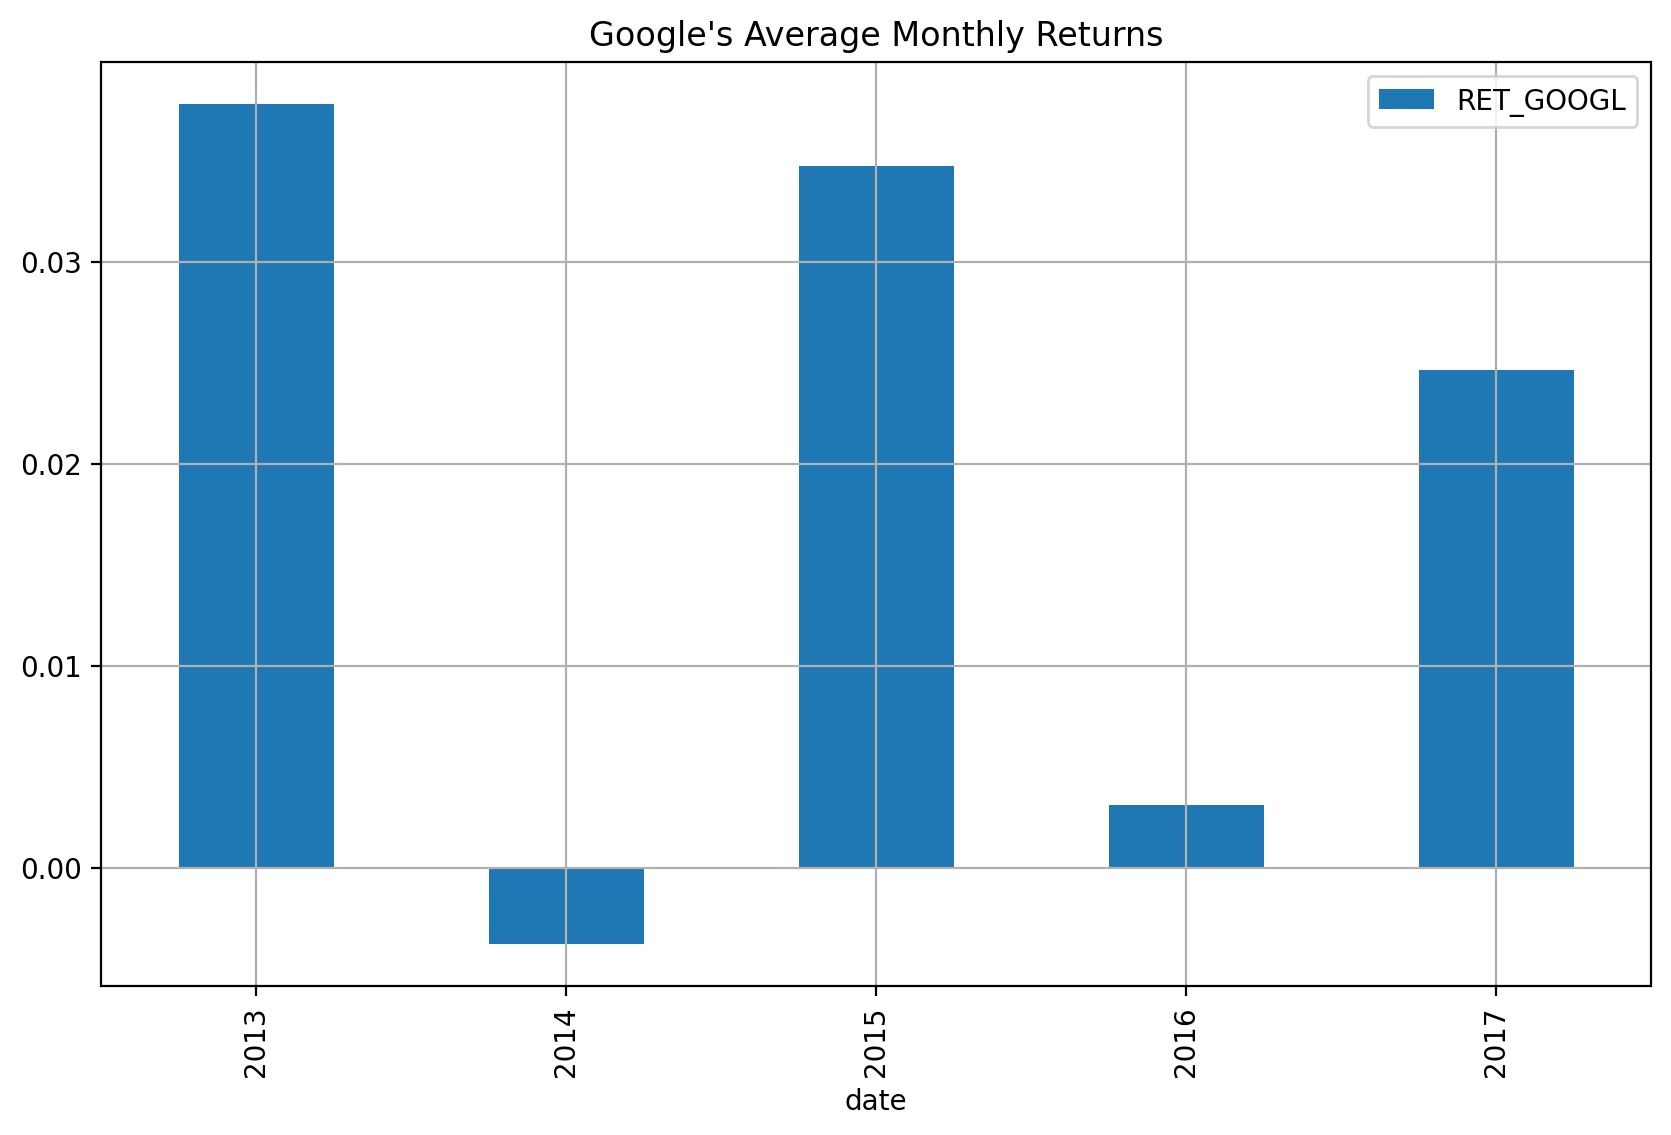

In [15]:
rets_annual.plot.bar(y = 'RET_GOOGL', figsize = (10,6),
                    grid = True, title = "Google's Average Monthly Returns");

#### 14. Create a bar plot of all annual average monthly returns (on y axis) across stocks (on x axis). Use a figure size of (10,6), add a grid and title.

In [16]:
rets_annual.transpose()

date,2013,2014,2015,2016,2017
RET_MSFT,0.030190,0.018507,0.019462,0.011188,0.027523
RET_IBM,-0.006206,-0.011548,-0.011904,0.017534,-0.005675
RET_FB,0.065318,0.032353,0.026170,0.009244,0.037319
RET_AAPL,0.021374,0.029030,-0.002163,0.010616,0.033731
RET_AMZN,0.039761,-0.018396,0.070607,0.011368,0.038922
RET_GOOGL,0.037804,-0.003770,0.034716,0.003091,0.024652


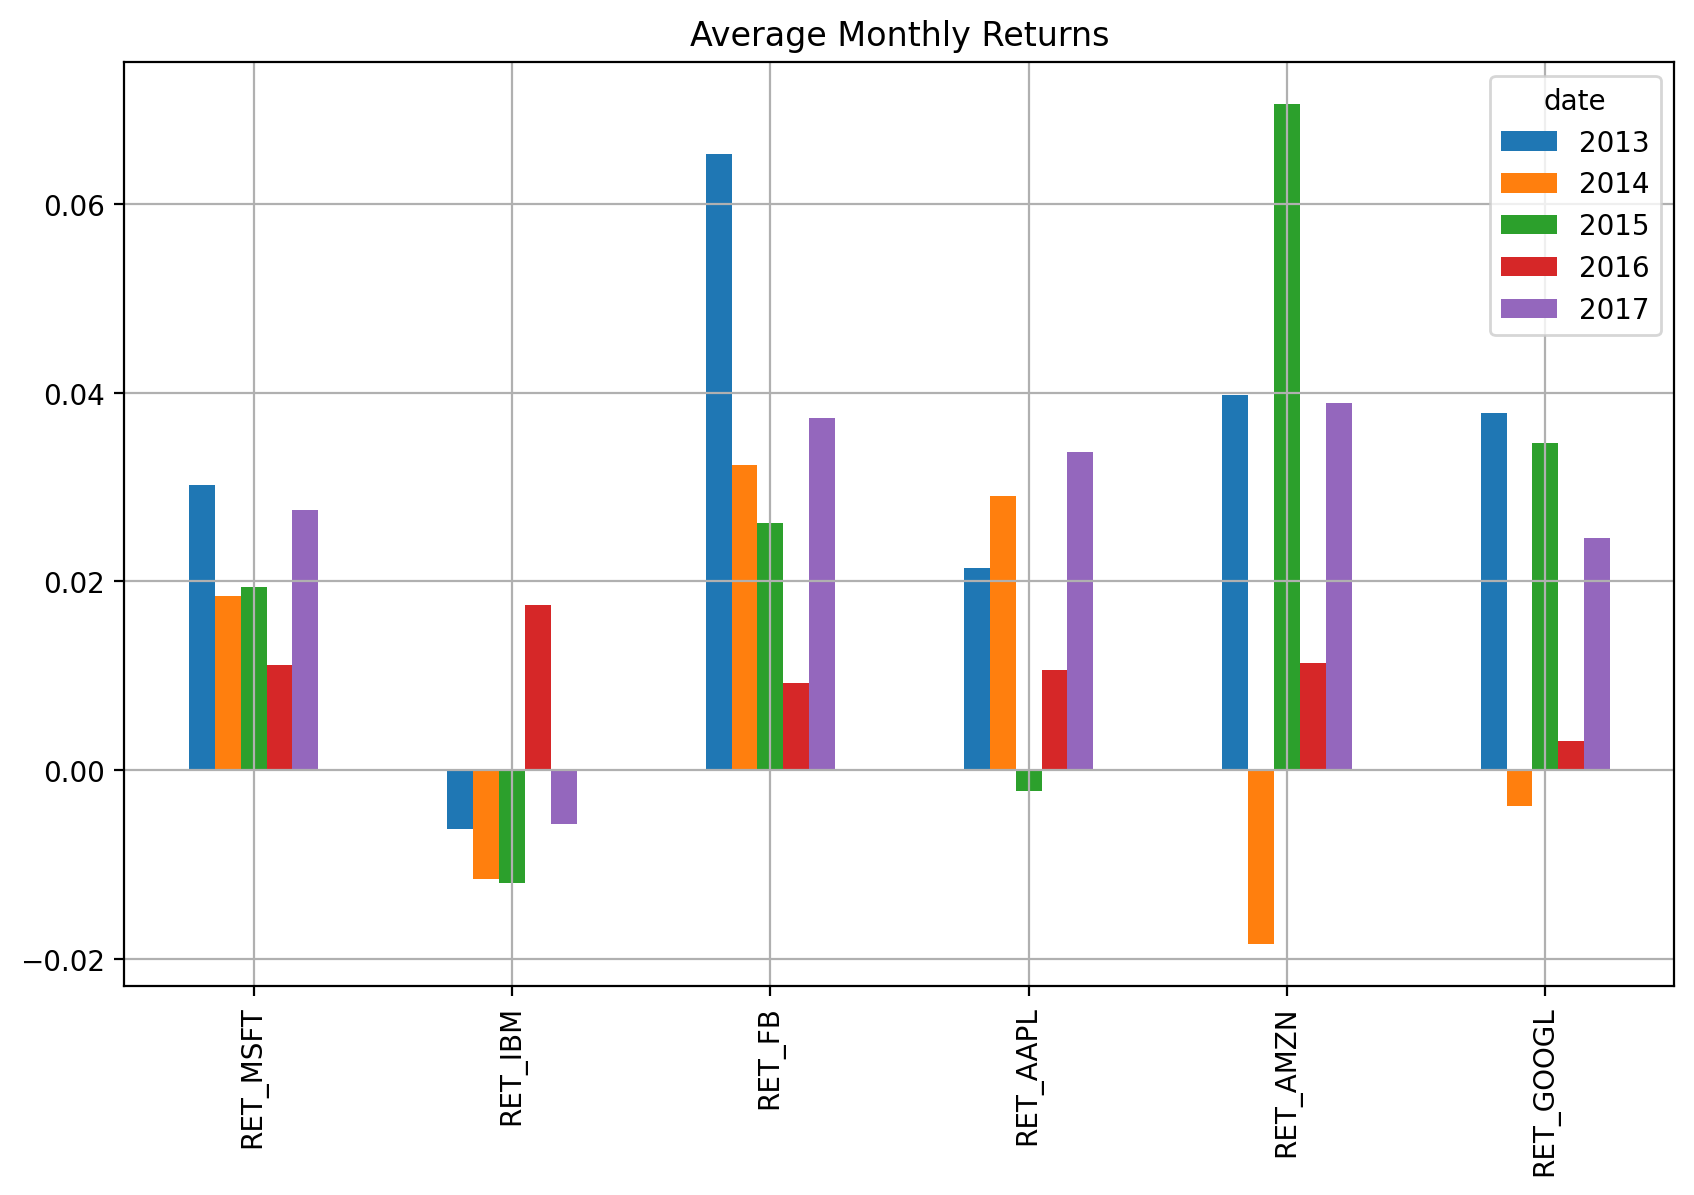

In [20]:
rets_annual.transpose().plot.bar(y=rets_annual.transpose().columns,
                                 figsize = (10,6),
                                grid = True, title = 'Average Monthly Returns');

#### 15. Create a bar plot of the 2017 average monthly return (on y axis) across stocks (on x axis). Use a figure size of (10,6), add a grid and title.

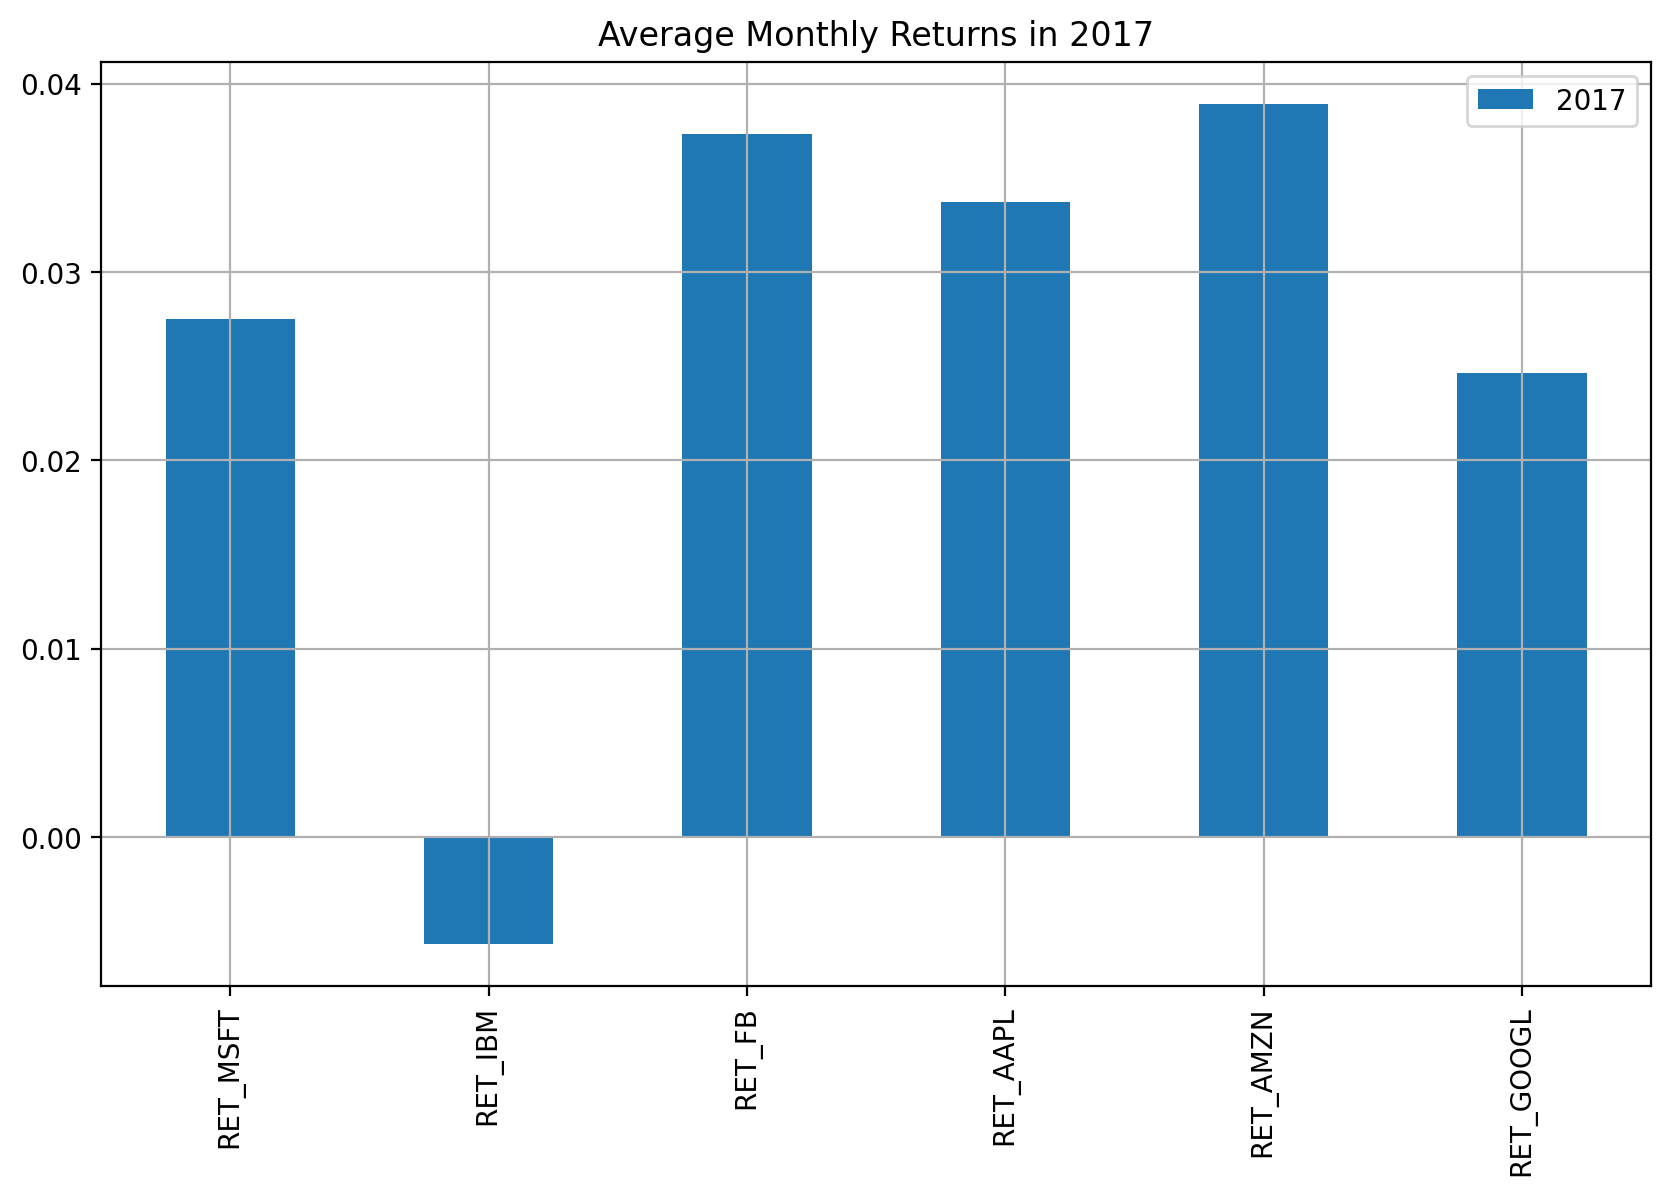

In [19]:
rets_annual.transpose().plot.bar(y = 2017, figsize = (10,6), grid = True,
                                 title = 'Average Monthly Returns in 2017');